In [1]:
import numpy
import pandas
from scipy import stats
from scipy.stats import norm

import seaborn
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Context

In this notebook we do some preliminary exploratory data analysis on the dataset.

### Load data

In [2]:
df = (
    pandas.read_csv("../data/raw/train.csv")
    .set_index(keys=["Id"])
)

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

### Examine target varaible - SalePrice

In [5]:
df[["SalePrice"]].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


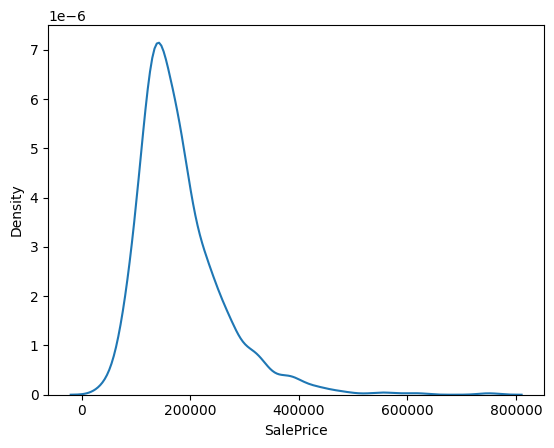

In [6]:
ax = seaborn.kdeplot(df["SalePrice"])

In [7]:
df["SalePrice"].skew()

1.8828757597682129

In [8]:
df["SalePrice"].kurtosis()

6.536281860064529

### Correlations with Numerical Features

In [9]:
area_features = [
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GarageArea",
]

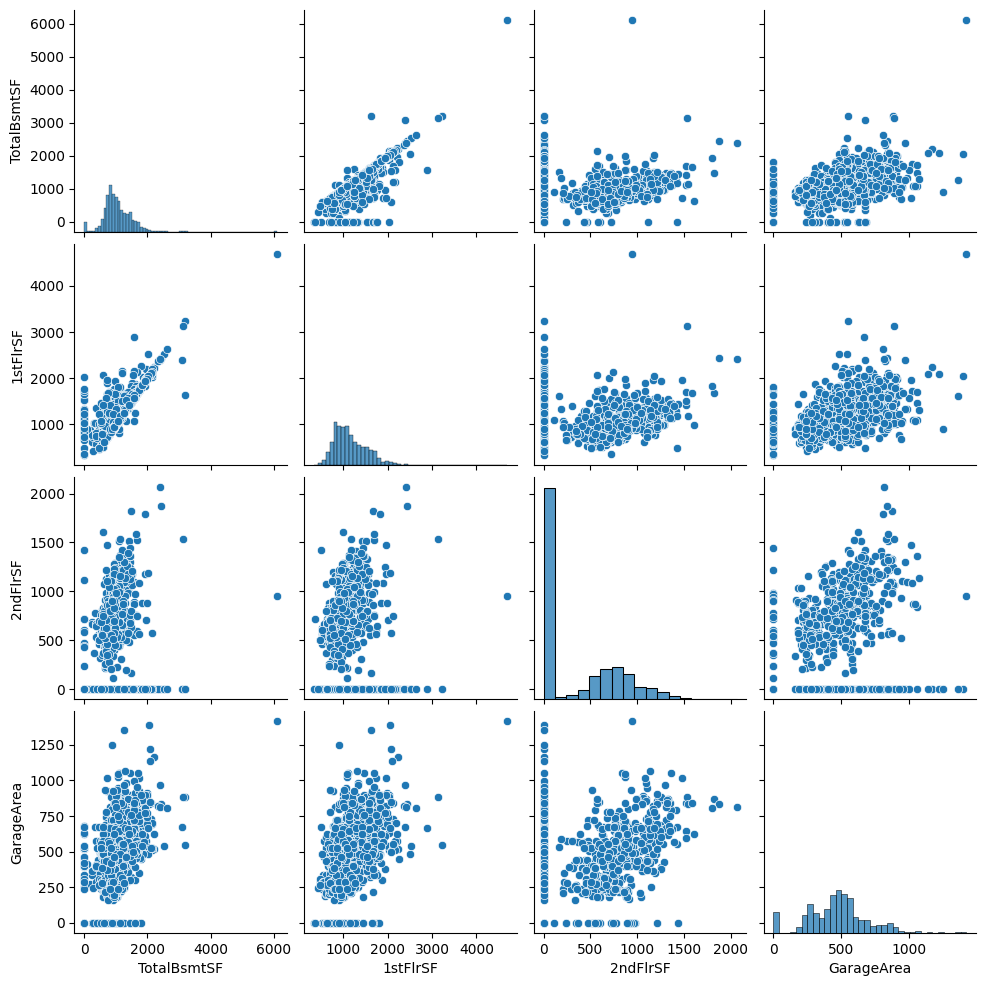

In [10]:
seaborn.pairplot(data=df[area_features])

In [11]:
df[area_features].corr()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea
TotalBsmtSF,1.000000,0.819530,-0.174512,0.486665
1stFlrSF,0.819530,1.000000,-0.202646,0.489782
2ndFlrSF,-0.174512,-0.202646,1.000000,0.138347
GarageArea,0.486665,0.489782,0.138347,1.000000


### Examine a few categoricals

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

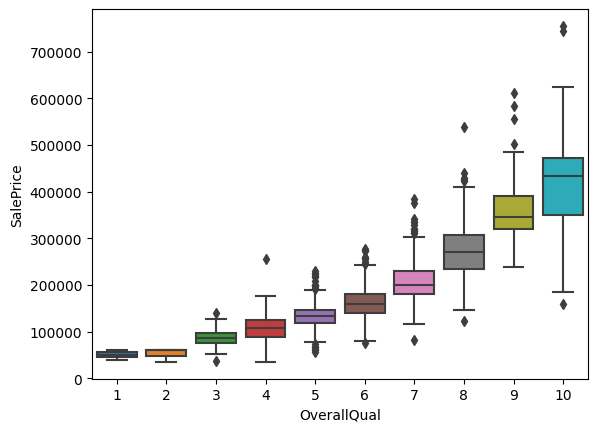

In [12]:
seaborn.boxplot(data=df, x="OverallQual", y="SalePrice")

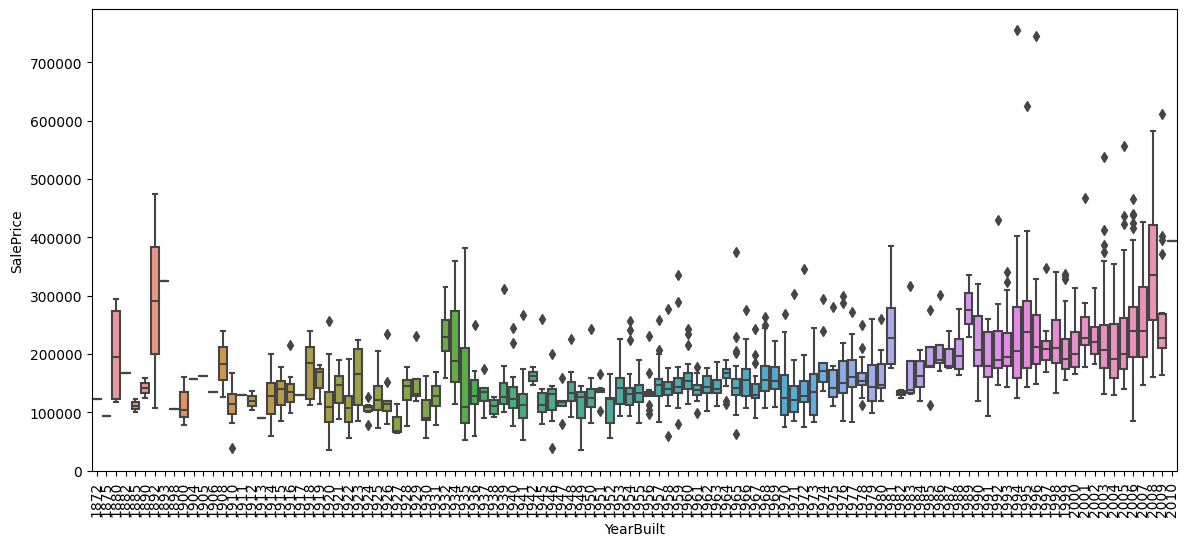

In [13]:
f, ax = plt.subplots(figsize=(14, 6))

seaborn.boxplot(data=df, x="YearBuilt", y="SalePrice", ax=ax)
plt.xticks(rotation=90);

### Feature Correlations

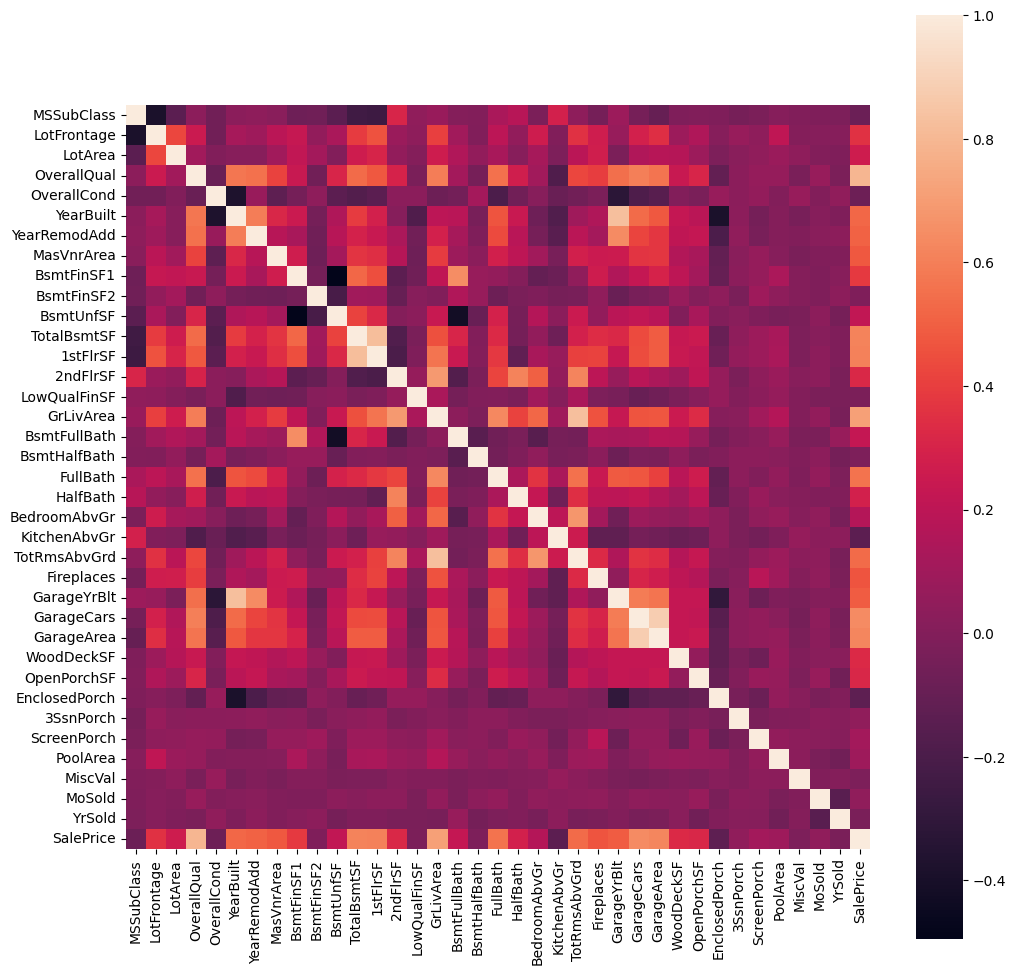

In [14]:
correlation_matrix = df.corr(numeric_only=True)

f, ax = plt.subplots(1, 1, figsize=(12, 12))

ax = seaborn.heatmap(correlation_matrix, square=True, ax=ax)

Extract features with highest correlation to SalePrice

In [15]:
n_largest = correlation_matrix["SalePrice"].sort_values(ascending=False).head(8).index

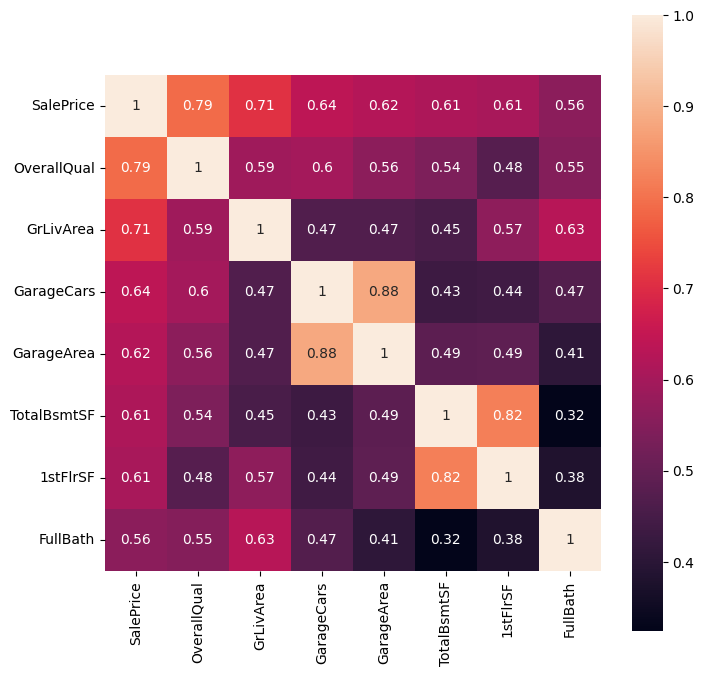

In [16]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

ax = seaborn.heatmap(
    correlation_matrix.loc[n_largest][n_largest],
    square=True,
    annot=True,
    ax=ax
)

In [51]:
(
    correlation_matrix
    .stack()
    .to_frame("Correlation")
    .reset_index()
    .loc[lambda x: x["level_0"] != x["level_1"]]
    .set_index(keys=["level_0", "level_1"])
    .sort_values(by=["Correlation"], ascending=False)
    .head(10)
)

,,Correlation
level_0,level_1,
GarageCars,GarageArea,0.882475
GarageArea,GarageCars,0.882475
GarageYrBlt,YearBuilt,0.825667
YearBuilt,GarageYrBlt,0.825667
TotRmsAbvGrd,GrLivArea,0.825489
GrLivArea,TotRmsAbvGrd,0.825489
TotalBsmtSF,1stFlrSF,0.819530
1stFlrSF,TotalBsmtSF,0.819530
OverallQual,SalePrice,0.790982


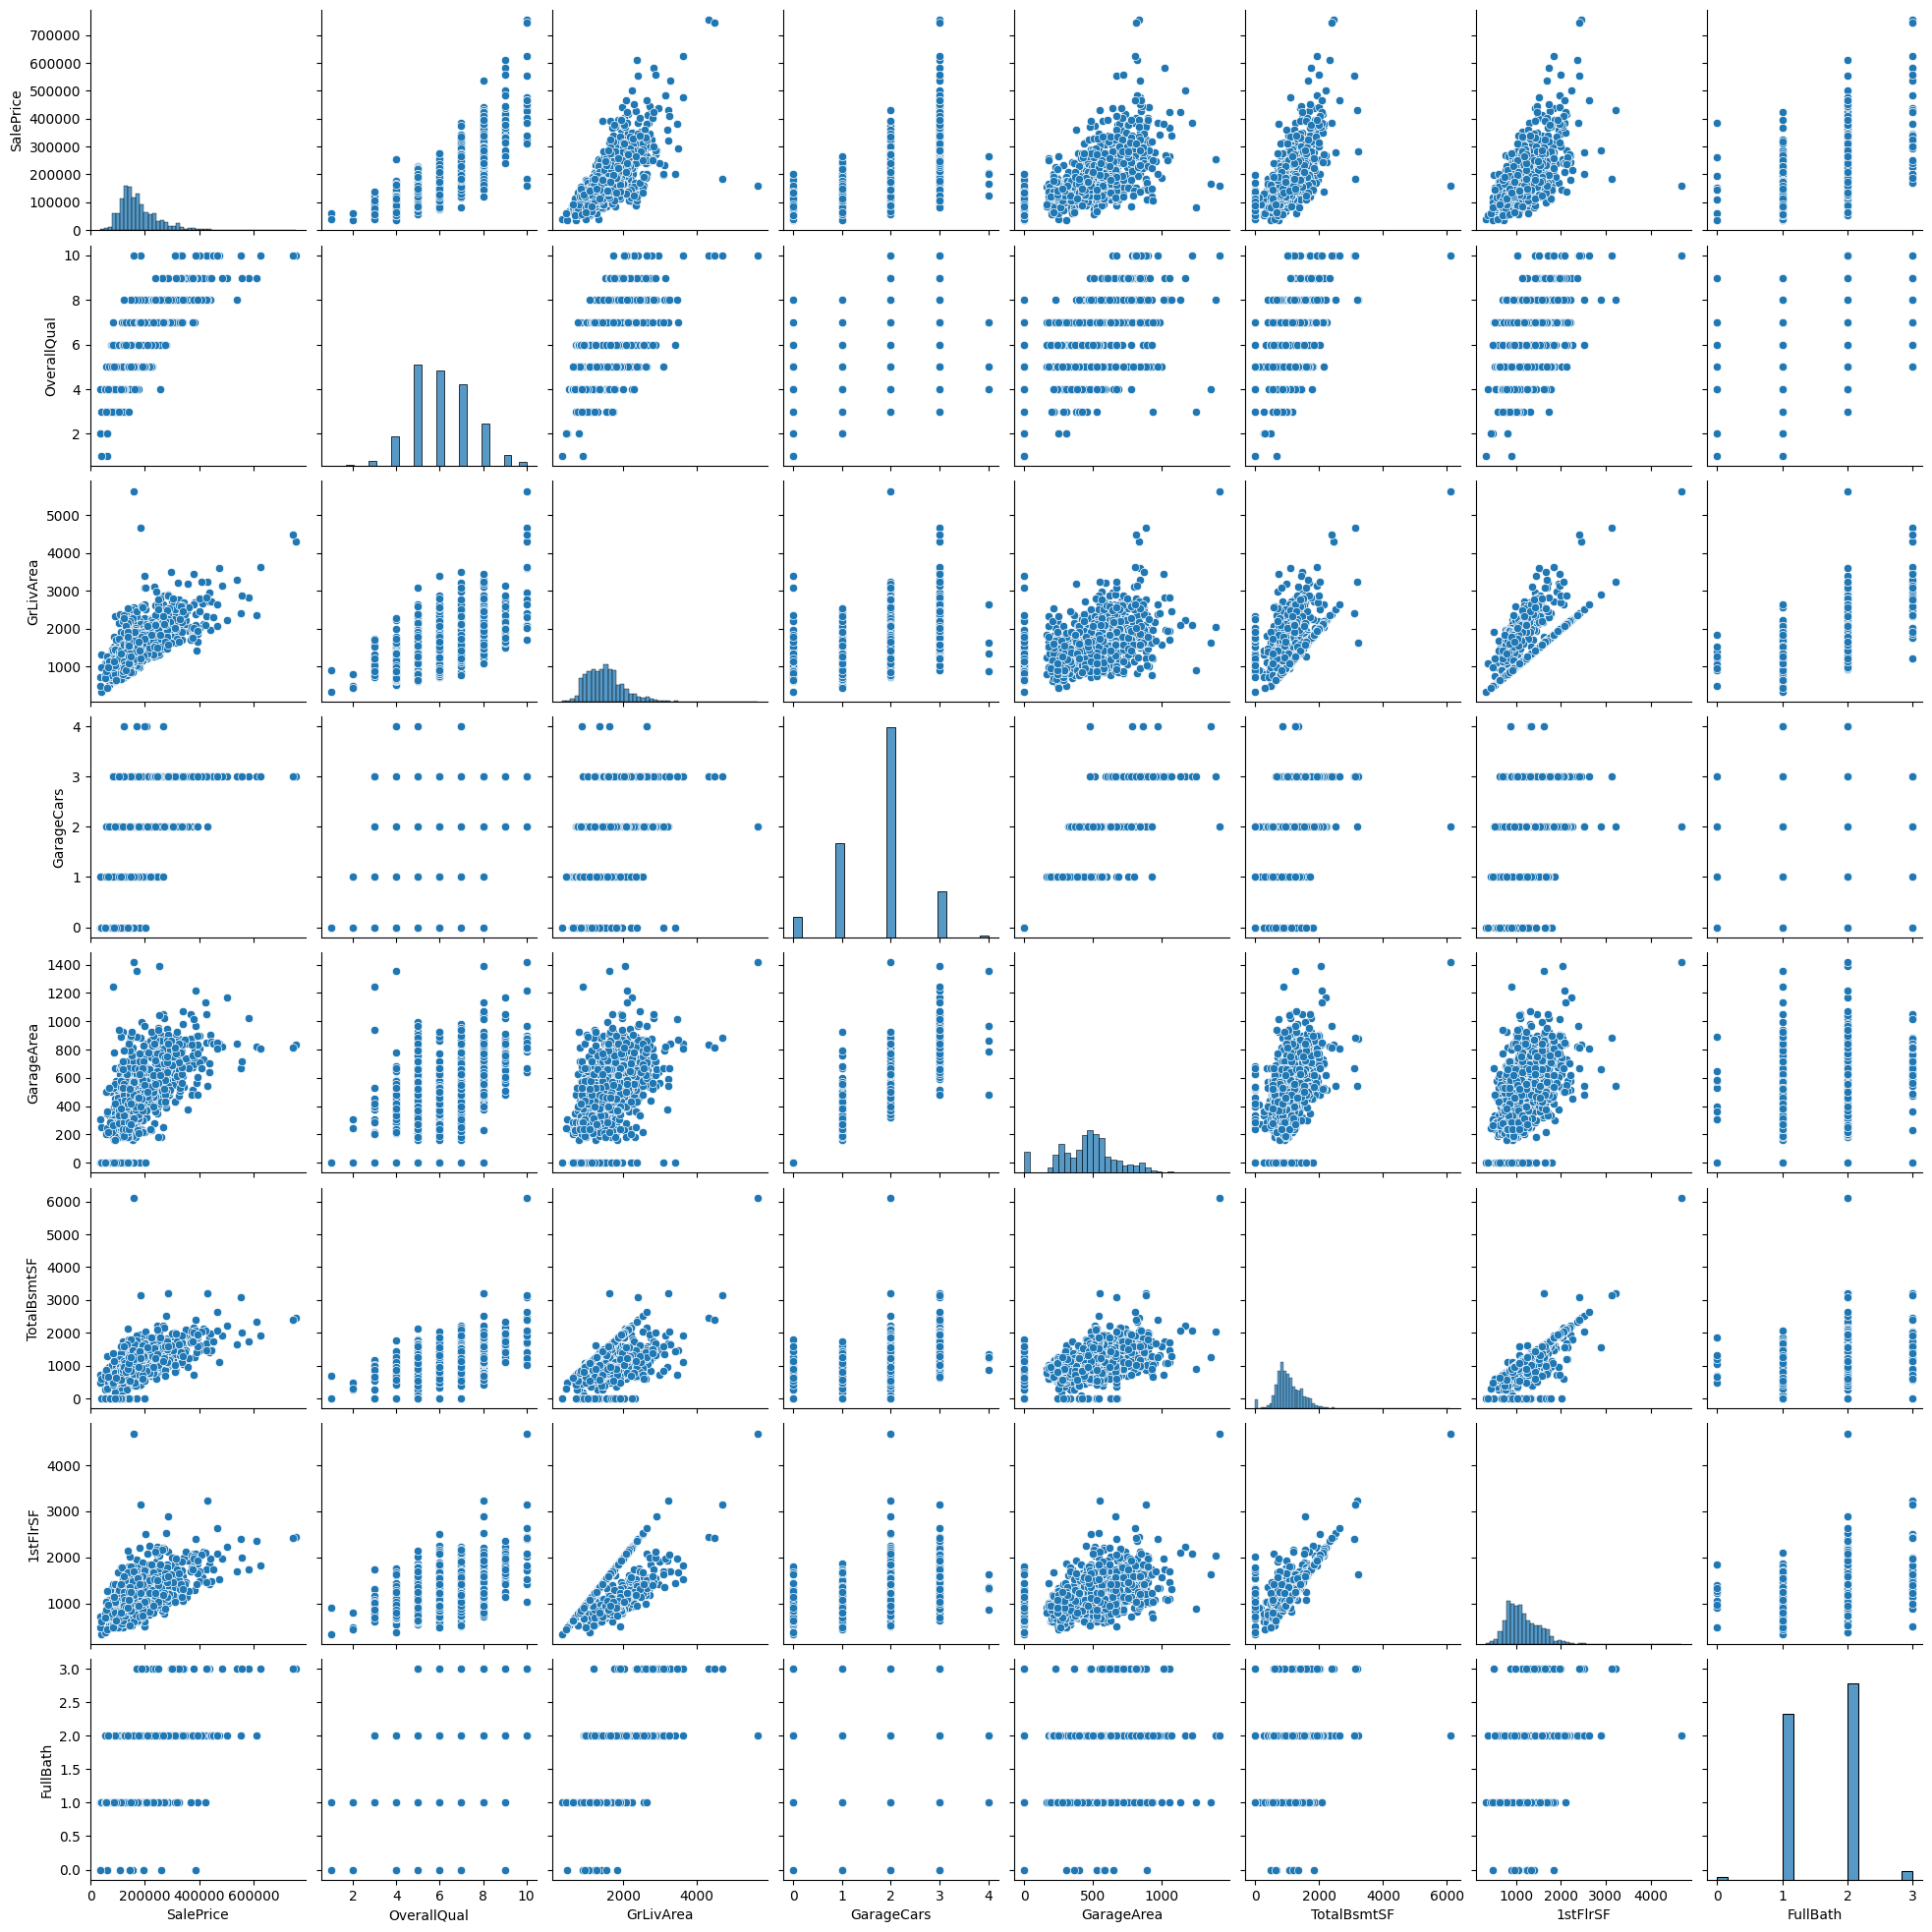

In [17]:
seaborn.pairplot(df[n_largest])

The above features exhibit the highest correlation with SalePrice, it would be prudent to examine each of these features in more detail.

Some features over a set range may benefit from standard scaling, such as OverallQual, GarageCars, FullBath.

### Missing Data

In [18]:
df_missing_data = (
    df
    .isnull()
    .sum()
    .sort_values(ascending=False)
    .to_frame("Nulls")
    .assign(NullsPct=lambda x: x["Nulls"] / len(df))
    .head(20)
    .sort_values(by=["NullsPct"], ascending=False)
    .reset_index()
)

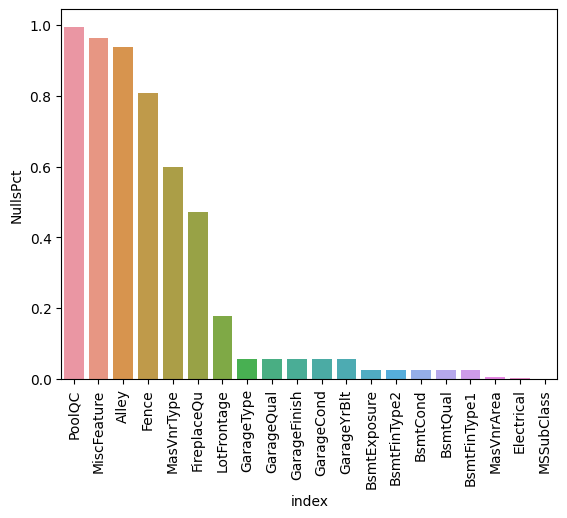

In [19]:
seaborn.barplot(data=df_missing_data, x="index", y="NullsPct")
plt.xticks(rotation=90);

Note that the following features have a lot of missing values - it would be prudent to examine them separetely in more detail.
* PoolQC
* MiscFeature
* Alley
* Fence
* MasVnrType
* FireplaceQu
* LotFrontage

### Model Normality Assumptions

Extract features which exhibit high skew, for these features we should apply a power transformation.

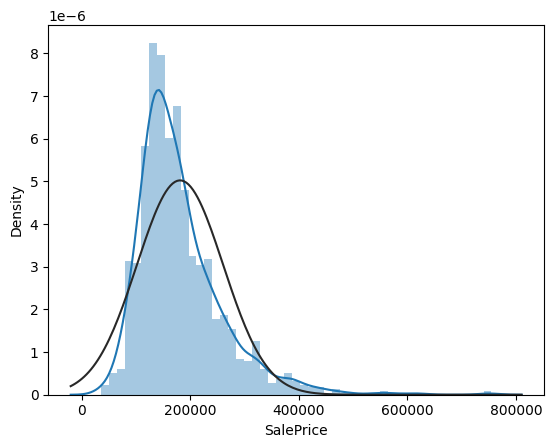

In [20]:
seaborn.distplot(df["SalePrice"], fit=norm);

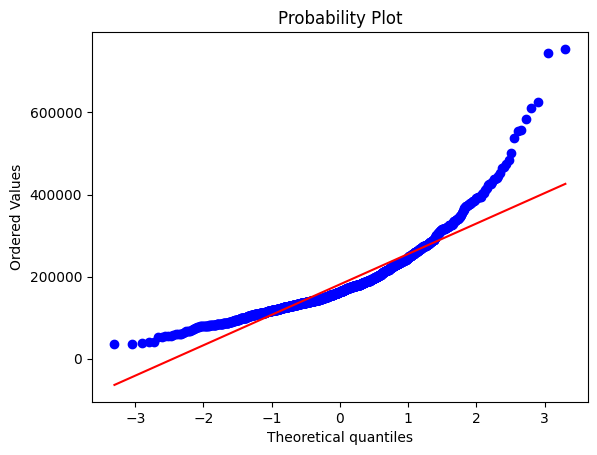

In [21]:
stats.probplot(df["SalePrice"], plot=plt);

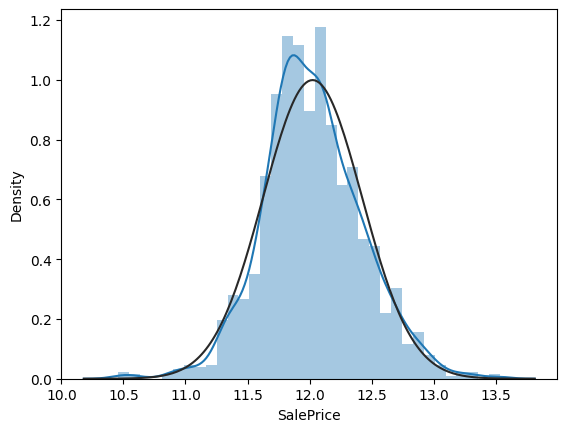

In [22]:
seaborn.distplot(numpy.log(1 + df["SalePrice"]), fit=norm);

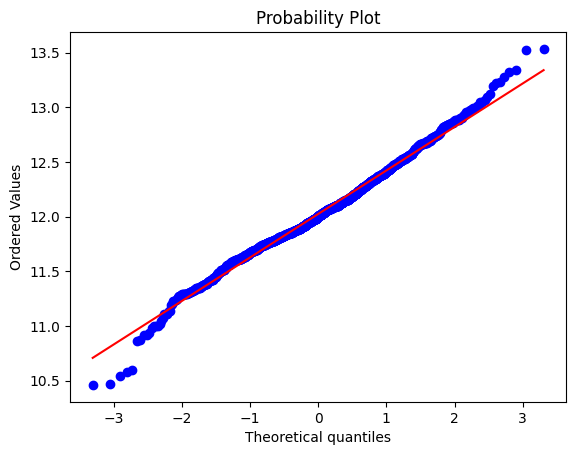

In [23]:
stats.probplot(numpy.log(1 + df["SalePrice"]), plot=plt);

In [24]:
numeric_features = df.dtypes[df.dtypes != "object"].index

In [25]:
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
df[numeric_features].skew().sort_values(ascending=False).head(15)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
dtype: float64

### Outliers

In [27]:
log_target = numpy.log(1 + df["SalePrice"])

mu, std = log_target.mean(), log_target.std()

In [28]:
log_target_z = (log_target - mu) / std

In [29]:
log_target_z[log_target_z.abs() > 3].sort_values()

Id
496    -3.914857
917    -3.885548
969    -3.708417
534    -3.617611
31     -3.573414
441     3.010815
1047    3.017936
804     3.133744
899     3.254158
1170    3.308183
1183    3.747869
692     3.781248
Name: SalePrice, dtype: float64

In [30]:
idx_outliers = log_target_z[log_target_z.abs() > 3].sort_values().index.tolist()

In [31]:
idx_outliers

[496, 917, 969, 534, 31, 441, 1047, 804, 899, 1170, 1183, 692]

In [32]:
df_mod = df.copy()

df["IsOutlier"] = False
df.loc[idx_outliers, "IsOutlier"] = True

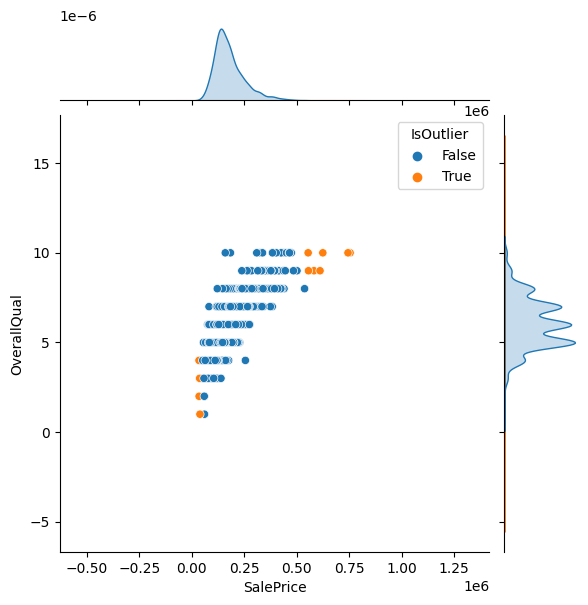

In [33]:
seaborn.jointplot(data=df, x="SalePrice", y="OverallQual", hue="IsOutlier")

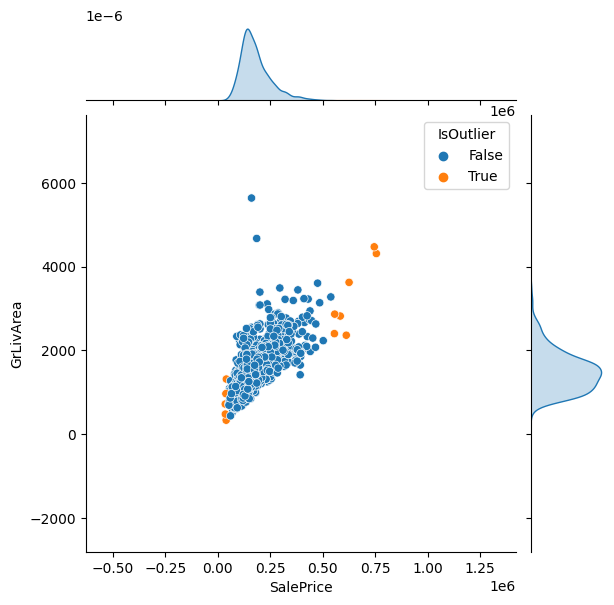

In [34]:
seaborn.jointplot(data=df, x="SalePrice", y="GrLivArea", hue="IsOutlier")

In [35]:
(
    df
    .sort_values(by="GrLivArea", ascending=False)
    [["GrLivArea", "SalePrice", "YrSold"]]
)

,GrLivArea,SalePrice,YrSold
Id,,,
1299,5642,160000,2008
524,4676,184750,2007
1183,4476,745000,2007
692,4316,755000,2007
1170,3627,625000,2006
...,...,...,...
529,605,86000,2007
30,520,68500,2008
917,480,35311,2006


Consider 524 and 1299 to be outliers

### Neighbourhoods

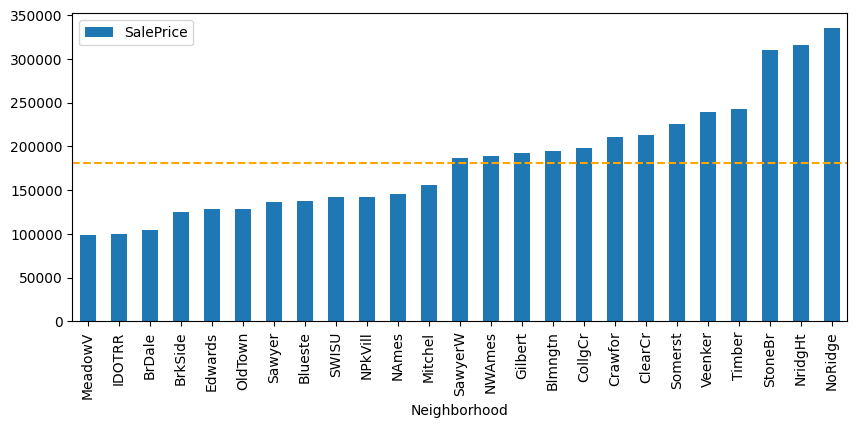

In [42]:
f, ax = plt.subplots(1, 1, figsize=(10, 4))

(
    df
    .groupby(by=["Neighborhood"])
    .agg({"SalePrice": "mean"})
    .sort_values("SalePrice")
).plot(kind="bar", ax=ax)

ax.axhline(y=df["SalePrice"].mean(), ls='--', color='orange');

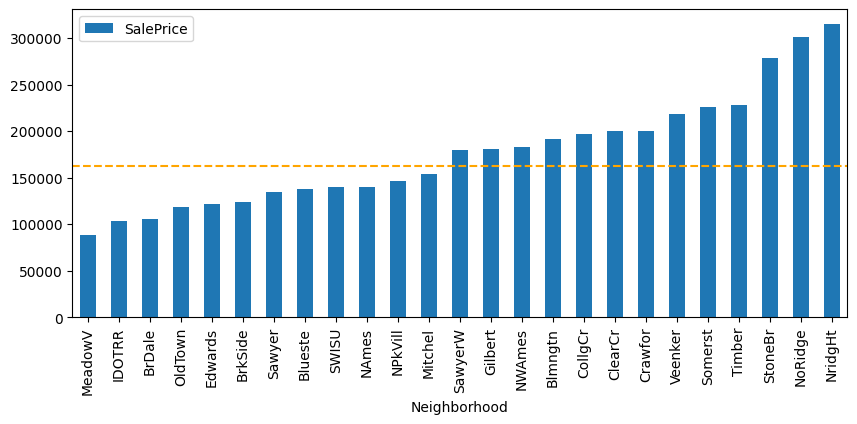

In [41]:
f, ax = plt.subplots(1, 1, figsize=(10, 4))

(
    df
    .groupby(by=["Neighborhood"])
    .agg({"SalePrice": "median"})
    .sort_values("SalePrice")
).plot(kind="bar", ax=ax)

ax.axhline(y=df["SalePrice"].median(), ls='--', color='orange');

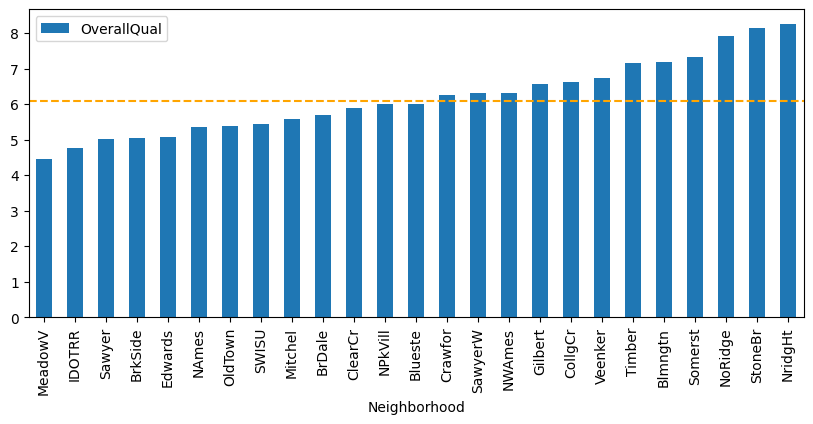

In [40]:
f, ax = plt.subplots(1, 1, figsize=(10, 4))

(
    df
    .groupby(by=["Neighborhood"])
    .agg({"OverallQual": "mean"})
    .sort_values("OverallQual")
).plot(kind="bar", ax=ax)

ax.axhline(y=df["OverallQual"].mean(), ls='--', color='orange');